# Student Performance Indicator
## Life cycle of Machine learning Project
Understanding the Problem Statement

Data Collection

Data Checks to perform

Exploratory data analysis

Data Pre-Processing

Model Training

Choose best model

## 1) Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

## 2) Data Collection
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


Import the csv dataset as pandas dataframe

In [2]:
df = pd.read_csv("data/raw.csv")

Lets print top 5 rows

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


lets see the shape of data frame

In [5]:
df.shape

(1000, 8)

### 2.2 Dataset information
* gender : sex of students -> (Male/female)
* race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
* parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
* lunch : having lunch before test (standard or free/reduced)
* test preparation course : complete or not complete before test
* math score
* reading score
* writing score

## 3) Data Checks to perform
* Check Missing values
* Check Duplicates
* Check data type
* Check the number of unique values of each column
* Check statistics of data set
* Check various categories present in the different categorical column

### 3.1 Check Missing values

In [6]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values in the dataset

### 3.2 Checking duplicates

In [7]:
df.duplicated().sum()

0

There are no duplicated values in the dataset

### 3.3 check data types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 43.0+ KB


We have 5 variables with categorical data and 3 variables with numerical data

### 3.4 Check number of unique values of each column

In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### 3.5 Chech statistics of datset

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### 3.6 Insight
* From above description of numerical data, all means are very close to each other - between 66 and 68.05;
* All standard deviations are also close - between 14.6 and 15.19;
* While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

### 3.7 Exploring Data

In [11]:
print("Categories in 'gender' variable:     ")
print(df['gender'].unique())

print("\nCategories in 'race_ethnicity' variable:  ")
print(df['race/ethnicity'].unique())

print("\nCategories in'parental level of education' variable:")
print(df['parental level of education'].unique())

print("\nCategories in 'lunch' variable:     ")
print(df['lunch'].unique())

print("\nCategories in 'test preparation course' variable:     ")
print(df['test preparation course'].unique())

Categories in 'gender' variable:     
['female' 'male']

Categories in 'race_ethnicity' variable:  
['group B' 'group C' 'group A' 'group D' 'group E']

Categories in'parental level of education' variable:
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Categories in 'lunch' variable:     
['standard' 'free/reduced']

Categories in 'test preparation course' variable:     
['none' 'completed']


In [13]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : \n{}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : \n{}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : 
['math score', 'reading score', 'writing score']

We have 5 categorical features : 
['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


### 3.8 Adding two new columns 'total score' and 'average score'

In [14]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average score'] = df['total score']/3

In [15]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


Lets find the number of students who scored out of marks in all subjects

In [20]:
maths_outof = df[df['math score'] == 100]['average score'].count()
reading_outof = df[df['reading score'] == 100]['average score'].count()
writing_outof = df[df['writing score'] == 100]['average score'].count()

print(f'Number of students who scored out of marks in maths : {maths_outof}')
print(f'Number of students who scored out of marks in reading : {reading_outof}')
print(f'Number of students who scored out of marks in writing : {writing_outof}')

Number of students who scored out of marks in maths : 7
Number of students who scored out of marks in reading : 17
Number of students who scored out of marks in writing : 14


Lets find number of students who scored below 20 marks in all of the subjects.

In [21]:
maths_below20 = df[df['math score'] <= 20]['average score'].count()
reading_below20 = df[df['reading score'] <= 20]['average score'].count()
writing_below20 = df[df['writing score'] <= 20]['average score'].count()

print(f'Number of students who scored below 20 marks in maths : {maths_below20}')
print(f'Number of students who scored below 20 marks in reading : {reading_below20}')
print(f'Number of students who scored below 20 marks in writing : {writing_below20}')

Number of students who scored below 20 marks in maths : 4
Number of students who scored below 20 marks in reading : 1
Number of students who scored below 20 marks in writing : 3


#### Insights
By looking at the count of students out of marks and below 20 marks, 
We can easily say that students have performed best in reading and worst in maths

## 4) Data Visualisation

### 4.1 Visualise distribution of average score
* Histogram
* Kernel Distribution Function (KDE )

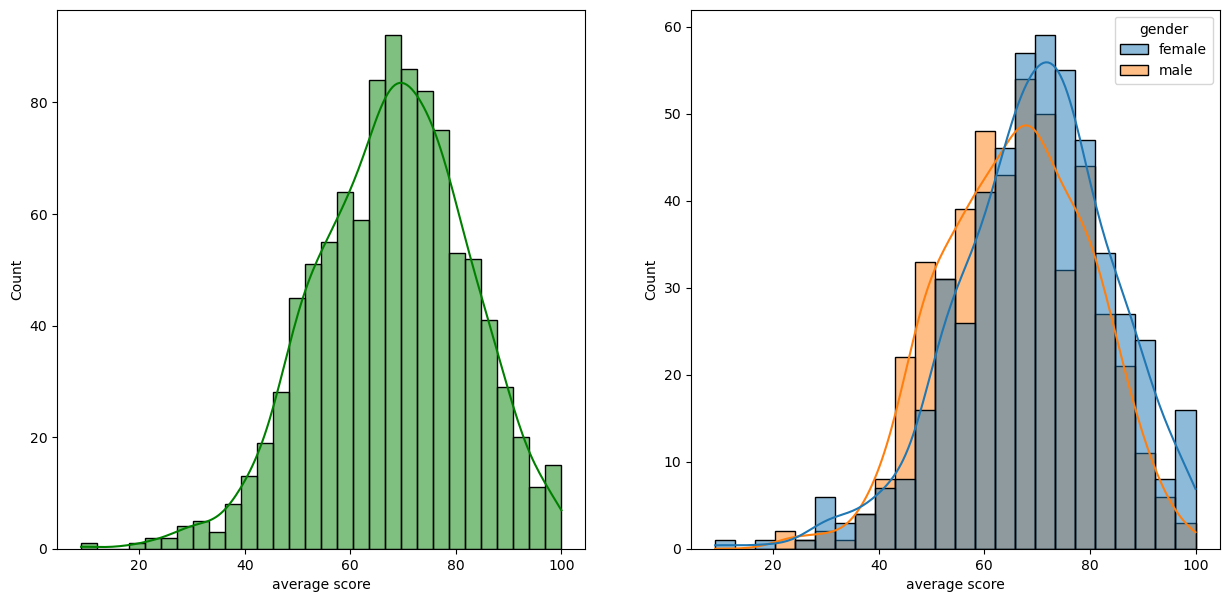

In [22]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average score', kde=True, hue='gender')
plt.show()

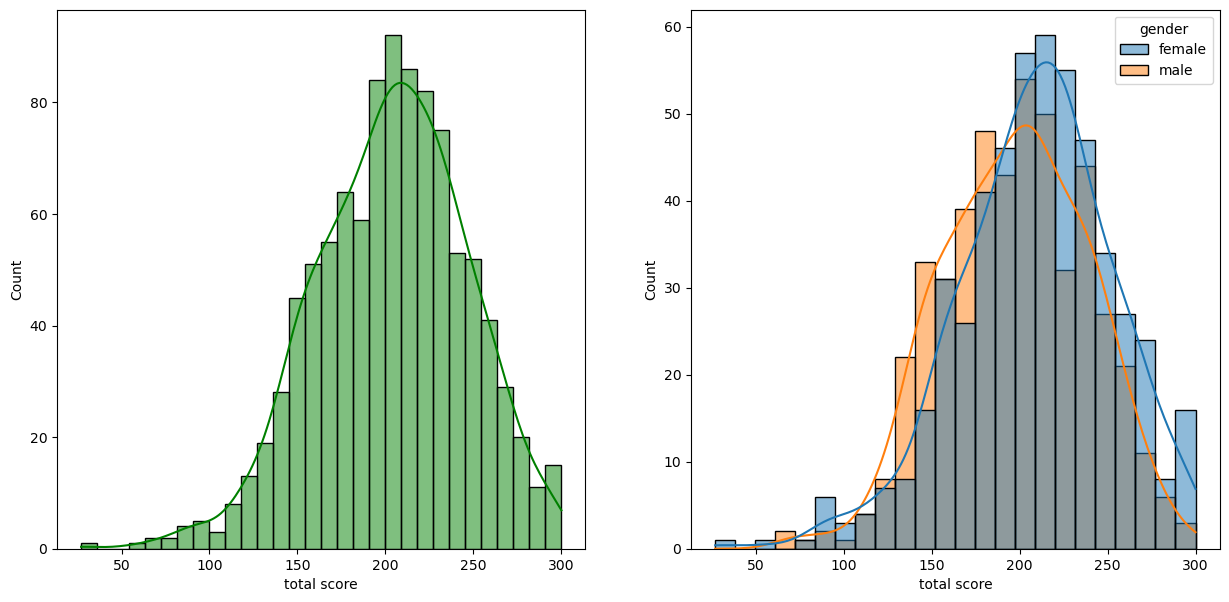

In [23]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='total score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total score', kde=True, hue='gender')
plt.show()

#### Insights
Female students tends to perform well then male students.

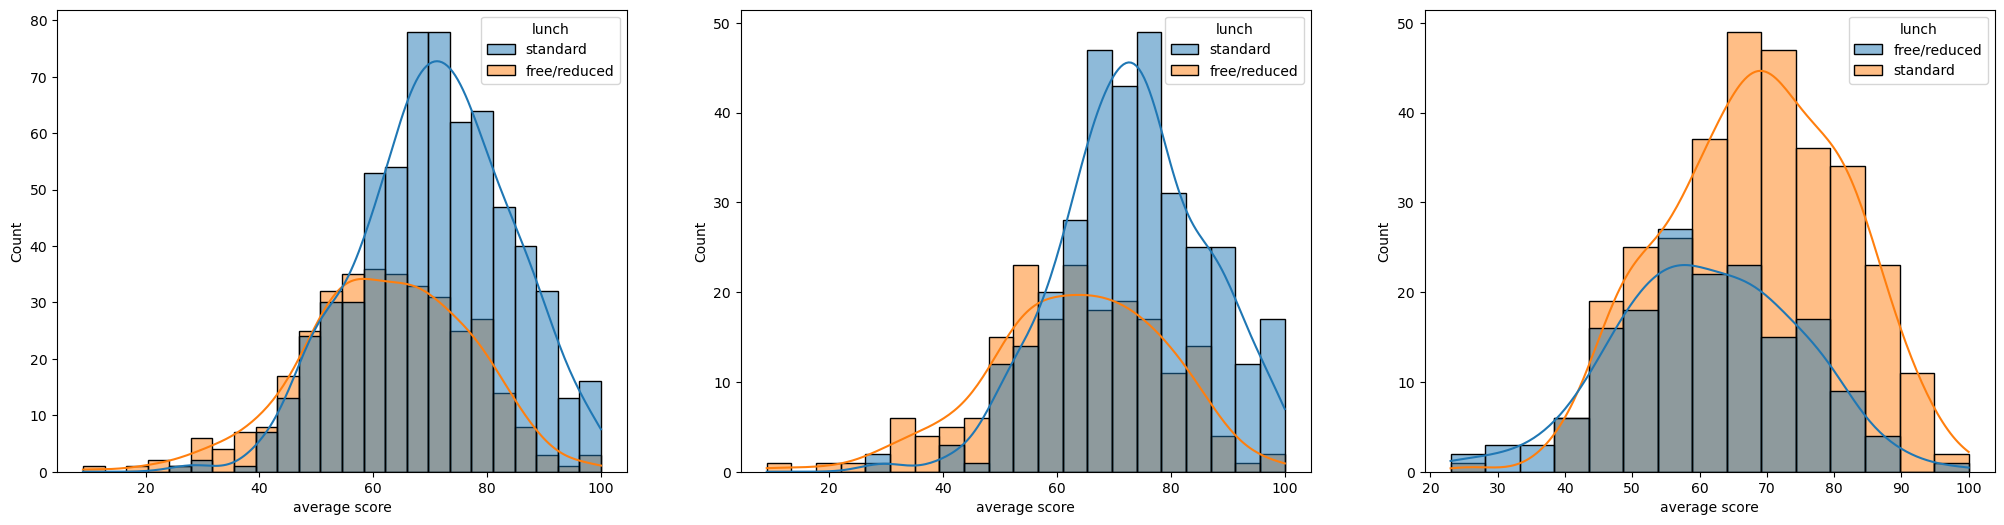

In [26]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x='average score', kde=True, hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df['gender']=='female'], x='average score', kde=True, hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df['gender']=='male'], x='average score', kde=True, hue='lunch')
plt.show()

#### Insights
* Standard lunch helped to get a good score 
* Standard lunch affected scores of male and female students equally.

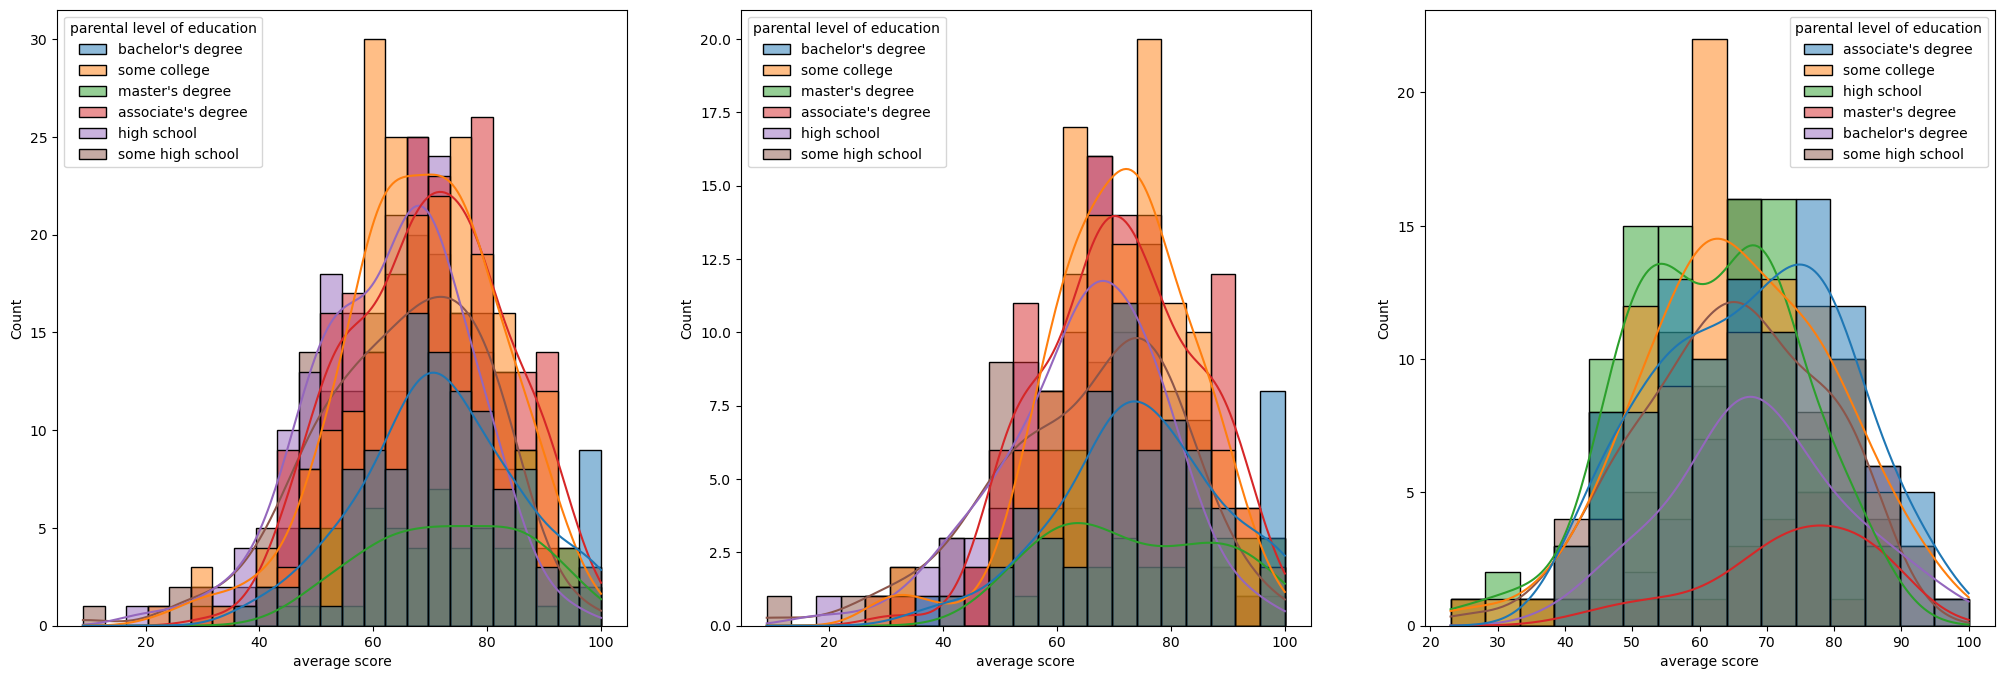

In [27]:
plt.subplots(1,3, figsize=(25,8))
plt.subplot(131)
sns.histplot(data=df, x='average score', kde=True, hue='parental level of education')
plt.subplot(132)
sns.histplot(data=df[df['gender']=='female'], x='average score', kde=True, hue='parental level of education')
plt.subplot(133)
sns.histplot(data=df[df['gender']=='male'], x='average score', kde=True, hue='parental level of education')
plt.show()

#### Insights
* Students whos parents have general eduction like 'some college', 'some high school', 'high school' have not performed well in exams.
* Male students whos fathers have higher eduction qualification like 'masters degree', 'associates degree' have performed well in exams, but this not same with the Female students. Education qualification of female studentsparents have not affected much.

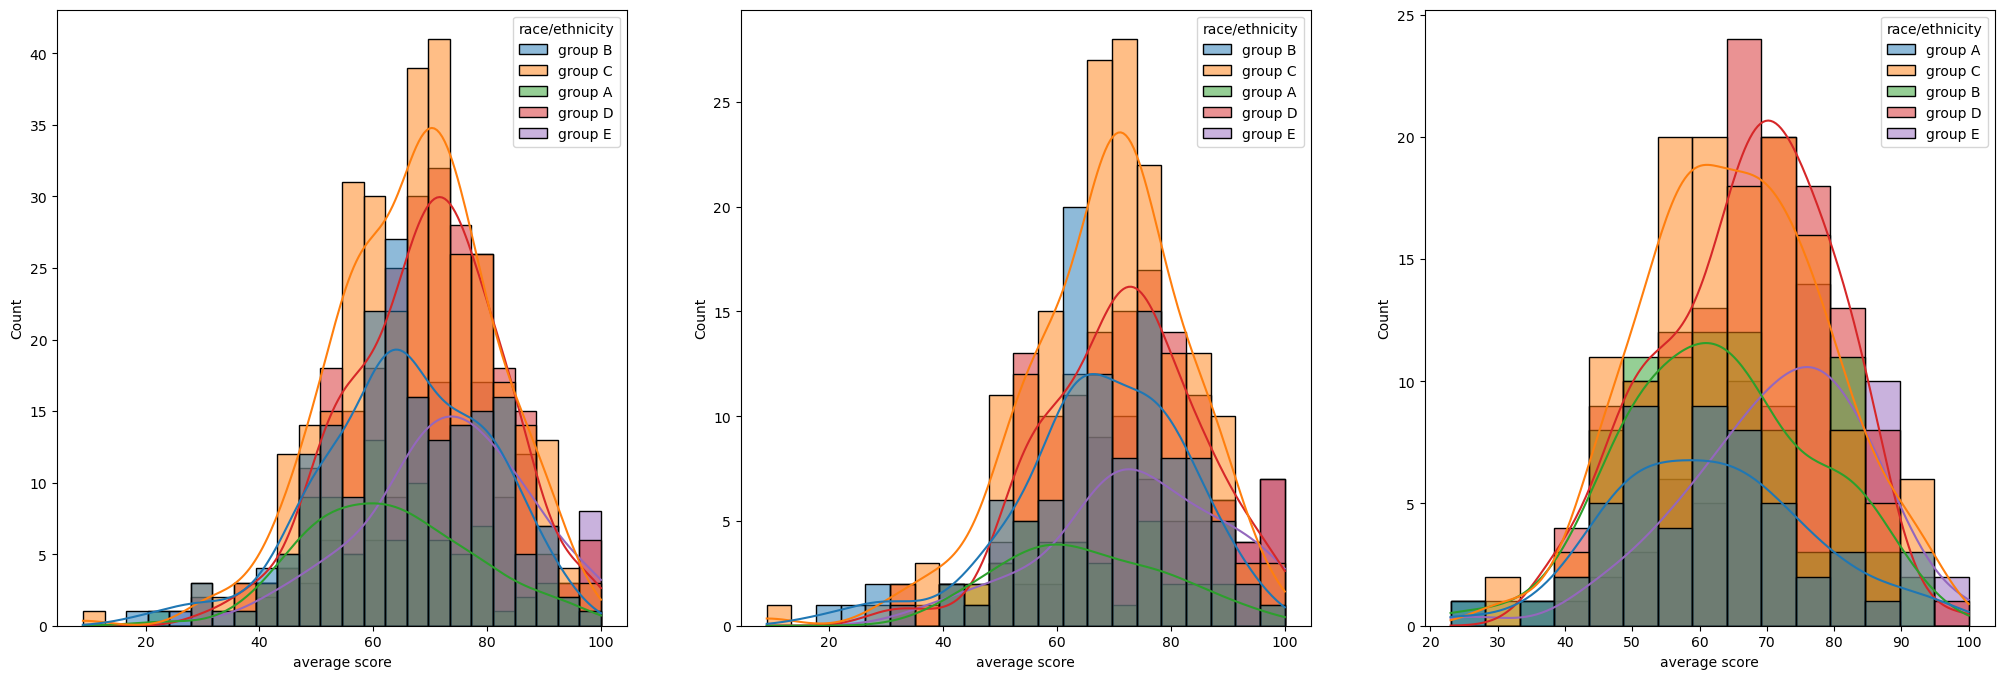

In [28]:
plt.subplots(1,3, figsize=(25,8))
plt.subplot(131)
sns.histplot(data=df, x='average score', kde=True, hue='race/ethnicity')
plt.subplot(132)
sns.histplot(data=df[df['gender']=='female'], x='average score', kde=True, hue='race/ethnicity')
plt.subplot(133)
sns.histplot(data=df[df['gender']=='male'], x='average score', kde=True, hue='race/ethnicity')
plt.show()

#### Insights
* Students of group A and B tends to perform poorly in exam irrespective of there gender.

#### 4.2 Maximum score of students in all the subjects

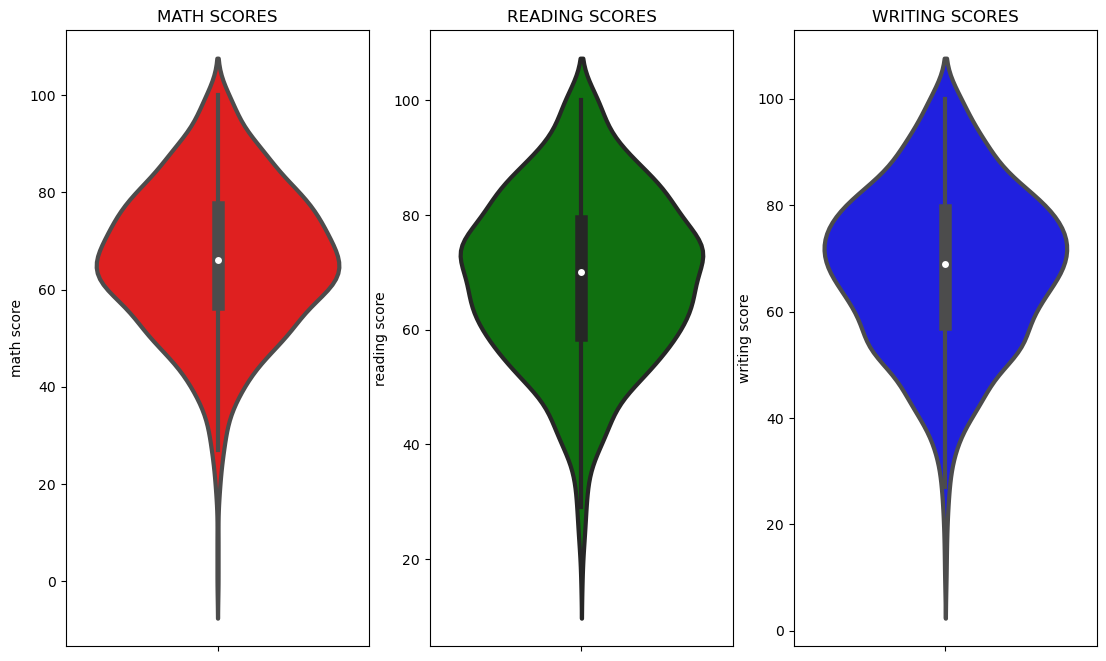

In [29]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

#### Insights
* From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

#### 4.3 Multivariate analysis using pie plots

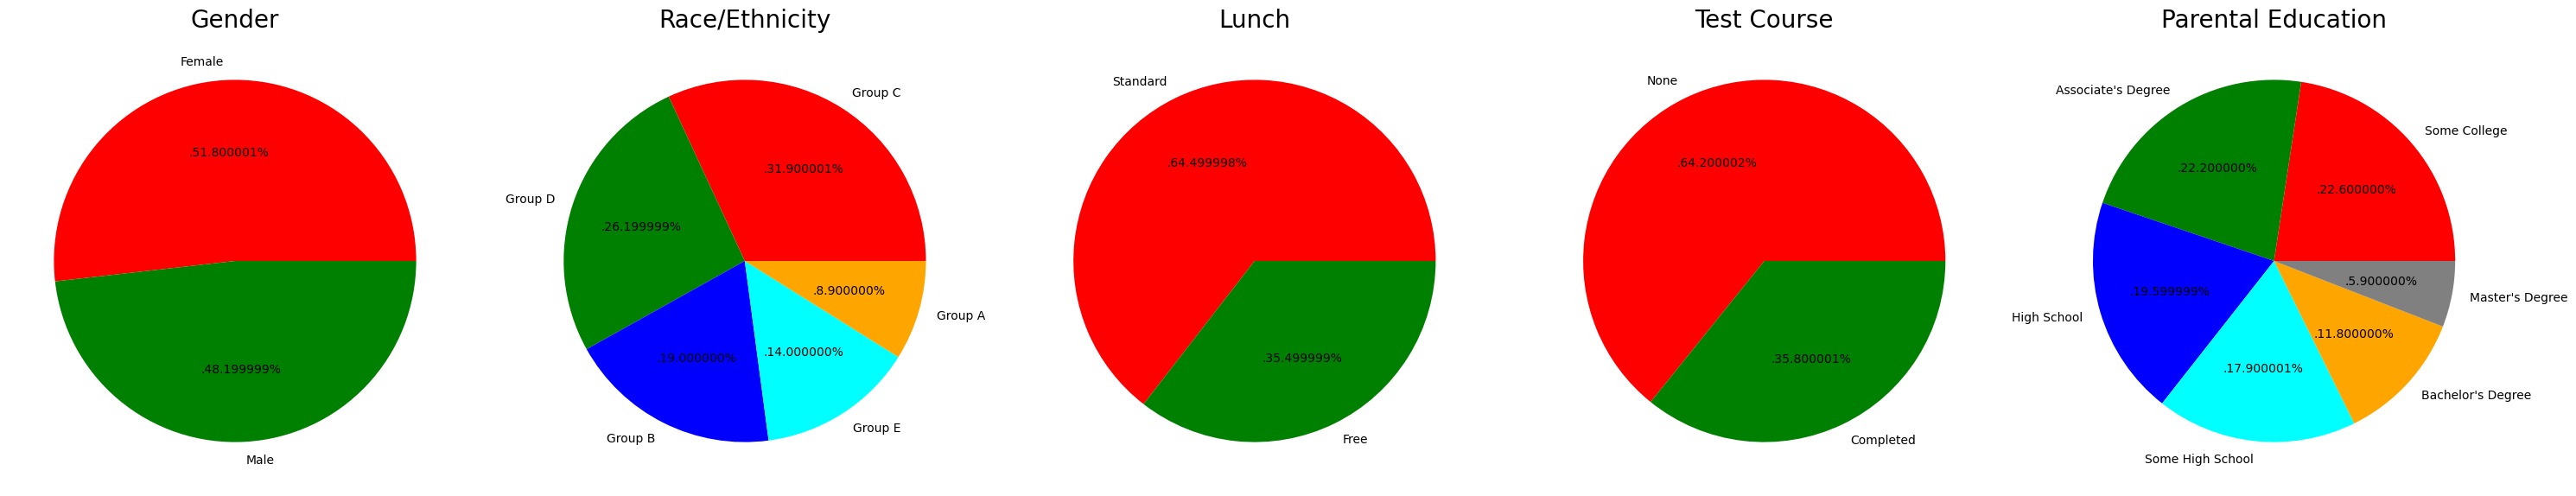

In [30]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#### Insights
* Number of Male and Female students is almost equal
* Number of students are greatest in Group C
* Number of students who have standard lunch are greater
* Number of students who have not enrolled in any test preparation course is greater
* Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"